In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from tqdm import tqdm
from sklearn.mixture import GaussianMixture
import time

%matplotlib inline
%config InlineBackend.figure_format='retina'
#!pip install git+https://github.com/M-Bianchi/My_matplotlib_style
plt.style.use('mystyle')

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Time to get your hands dirty. Black-hole binary formation channels with gaussian mixtures.

Many problems in astrophysics give rise to data with multiple modes. This is typically because different processes physical processes contribute to the observed dataset. 

For instance, one of the most outstanding question in gravitational-wave astrophysics is the formation channel of binary black holes. Leading scenarions include the evolution of isolated binaries in the galactic field and the dynamica assembly of sources in dense environments like globular clusters.


Right now, state-of-the-art analyses seems to say that many channels are all at play. This is a plot by [Zevin et al (2020)](https://arxiv.org/abs/2011.10057)

where they consider 5 possibilities for the formation of black hole binaries: common envelop (CE), chemically omogenous stars (CHE), globular clusters (GC), nuclear star clusters (NSC) and stable mass transfer (SMT). 

If you want to know more about LIGO-driven astrophysics and black hole binaries formation channels, these are some recent reviews: [Mandel and Farmer (2021)](https://arxiv.org/abs/1806.05820), [Mapelli (2021)](https://arxiv.org/abs/2106.00699), [Gerosa and Fishbach (2021)](https://arxiv.org/abs/2105.03439).




Anyway. LIGO measures the masses of many black holes. You can find the dataset at `solutions/formationchannels.npy`.


*Hint*: Note that the data provided are of shape (N,1), not (N,). This might be confusing at first, but it's the format that sklearn wants (more on this in a future lecture).  A useful tool to convert between the two is [np.newaxis](https://stackoverflow.com/questions/29241056/how-does-numpy-newaxis-work-and-when-to-use-it).

In [3]:
x=np.linspace(0, 5, 6)
print(x, x.shape)
print(x[np.newaxis,:], x[np.newaxis,:].shape)
print(x[:,np.newaxis], x[:,np.newaxis].shape)

[0. 1. 2. 3. 4. 5.] (6,)
[[0. 1. 2. 3. 4. 5.]] (1, 6)
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]] (6, 1)


Some events form in different astrophysical environments than others. **You want to figure out how many of formation channels are at play.**


The strategy here is to fit a Gaussian Mixture model: that is, my model is a sum of $N$ gaussians each with mean $\mu_j$ and standard deviation $\sigma_j$ and weight $\alpha_j$:

$p(x_i|\theta) = \sum_{j=1}^N \alpha_j \mathcal{N}(\mu_j,\sigma_j) $

This depends on $3N-1$ parameters (not $3N$ because the sum of the $\alpha_j$ must be unity to ensure that this is a probability.

#### Tasks

1) Load this file (`np.load`) and complete a quick exploration of the data. How many modes do you think you see?

2) Take some time to explore `sklearn.mixture.GaussianMixture`. Check the documentation, some examples, the help menu, etc. You first need to define the model (instance of a class), and then train it on the data using the `fit` method (the data provided are already in the right numpy format!). This will output the trained model, which has various attributes.

*Note*. We'll do a more formal introduction to scikit-learn in one of the next lectures. This is meant to be a formative example on how you might find yourself dealing with a library you've never seen before. This happens *all the time* in scientific research!

3) Complete the fit 10 times with $N=1,...,10$ Gaussians. 

Note: `sklearn` by default will use the so-called [Expectation-Maximization algorithm](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm), which is one of the many great things in data science we don't have time to study in detail.

4) For each of this fits, compute the AIC (easy! It's a attribute of the trained model!). Plot $N$ vs AIC: which model is preferred?

5) Plot the preferred solution on top of the input data. You should get a very nice fit!

6) Understand (i.e. plot) which Gaussian mode corresponds to which part of the input dataset. 

*Hint:* Useful methods here are `score_samples` and `predict_proba`: you'll need them both. Try to understand what they do and how you can put them together.




### Class labels or "responsibilities"

Class labels are a very interesting by products of a mixture analysis.

What is the probability that a given gravitational-wave event comes from a given channel? This is called "responsiblity" (i.e. which mode is most likely to be responsible for that piece of data). 

$p(j|x_i) = \dfrac{\alpha_j \mathcal{N(\mu_j,\sigma_j)}}{\sum_{j=1}^N \alpha_j \mathcal{N}(\mu_j,\sigma_j)}$


#### At home: derive this using Bayes' rule

$p(j|x_i) = \dfrac{{\color{orange}p(x_i|j)} {\color{lightgreen}p(j)}}{{\color{dodgerblue}p(x_i)}} = 
\dfrac{{\color{orange}\mathcal{N(\mu_j,\sigma_j)}} {\color{lightgreen}\alpha_j}}{{\color{dodgerblue}\sum_{j=1}^N \alpha_j \mathcal{N}(\mu_j,\sigma_j)}}$

# Code

In [4]:
data = np.load('formationchannels.npy')
print(data, data.shape)

[[17.12172682]
 [ 5.94121793]
 [ 6.35914124]
 ...
 [34.34170191]
 [30.27018478]
 [25.93264098]] (2950, 1)


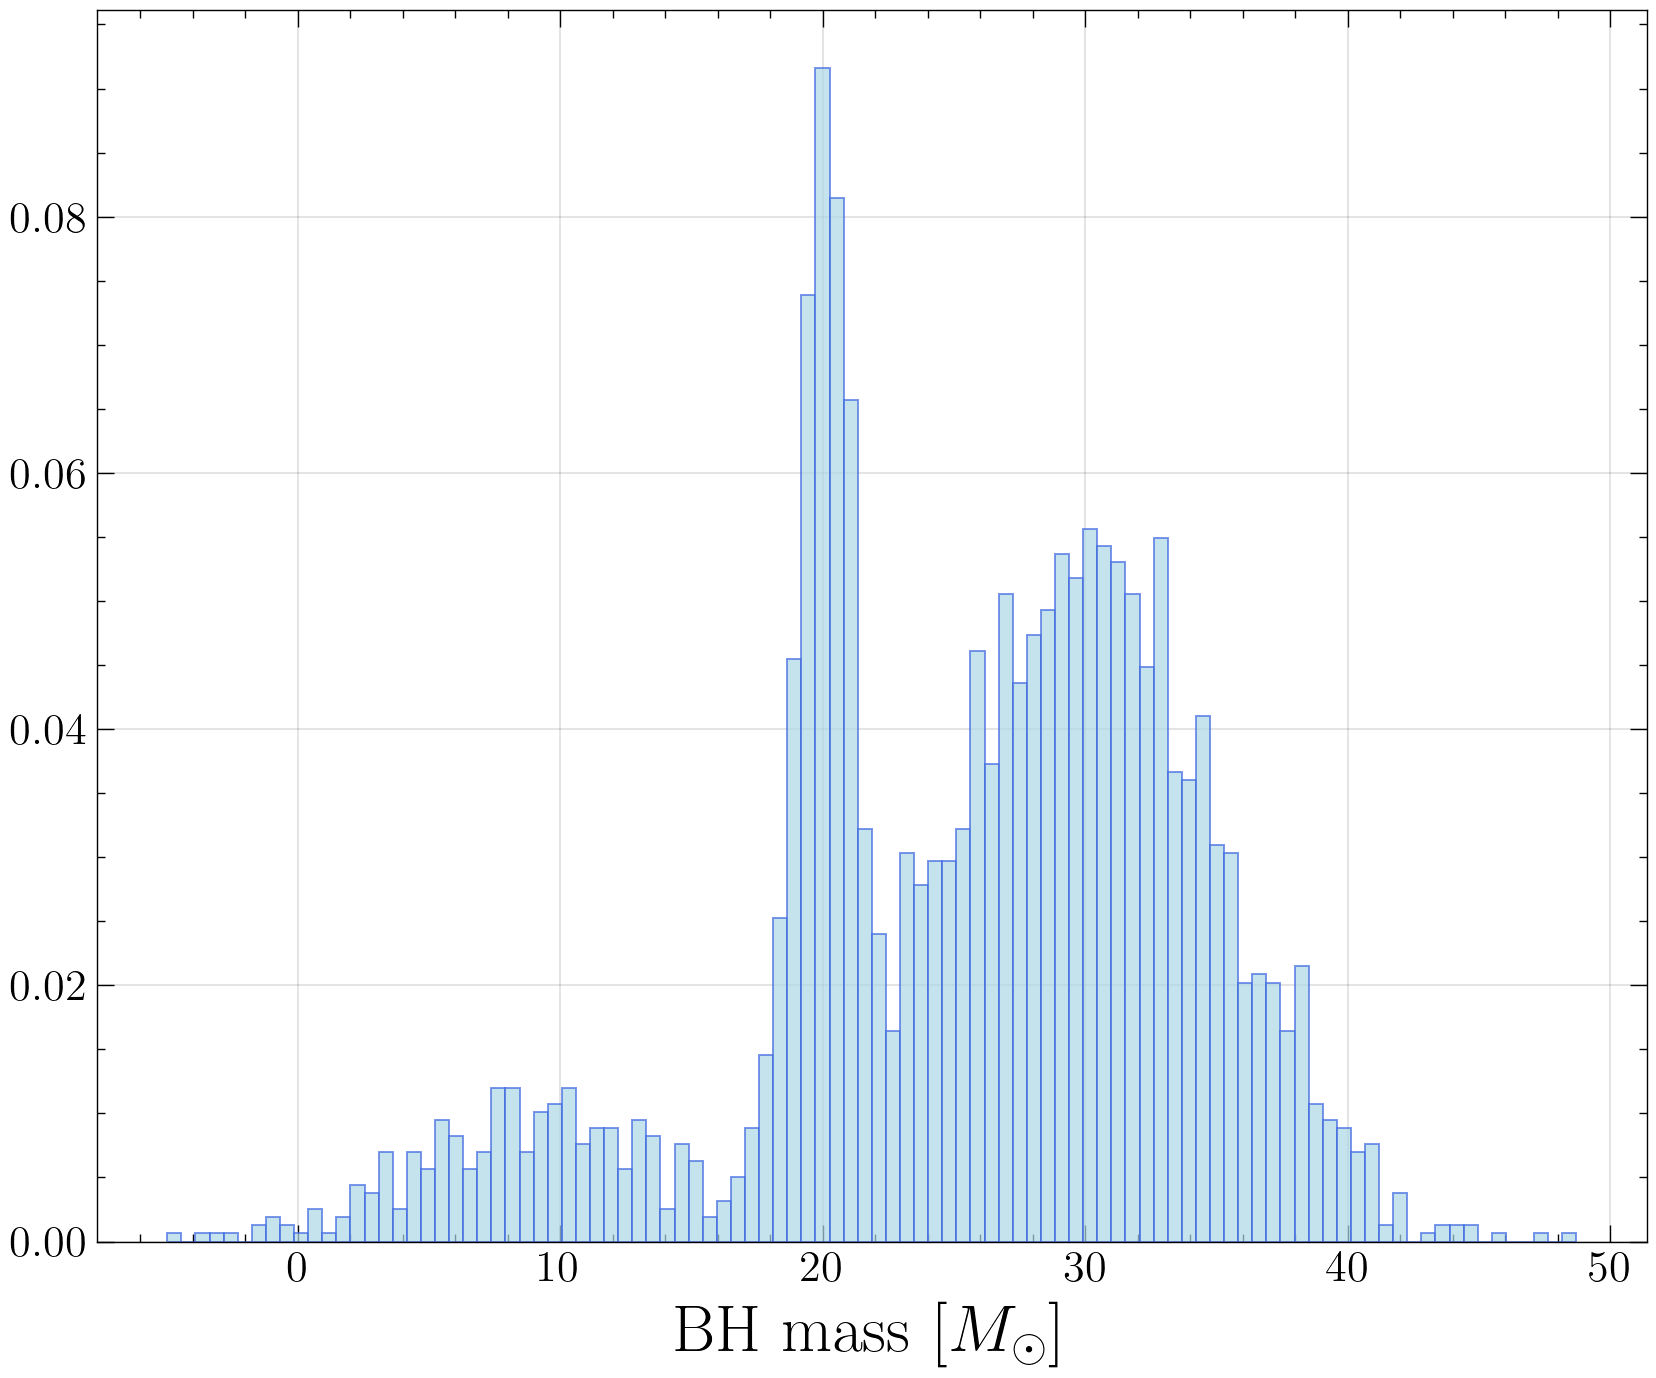

In [5]:
plt.hist(data, density=True, bins=100, color='lightblue', edgecolor='royalblue', alpha=0.7, linewidth=0.7);
plt.xlabel('BH mass [$M_\odot$]');

## Fitting with an increasing number of gaussians

In [6]:
N = np.arange(1, 11)
results = {}
aic_array = np.zeros(len(N))

for i in N:
    model = GaussianMixture(n_components=i, random_state=np.random.seed(time.gmtime()))
    result = model.fit(data)
    results[f'N={i}'] = result
    aic_array[i-1] = result.aic(data)
    
results

{'N=1': GaussianMixture(),
 'N=2': GaussianMixture(n_components=2),
 'N=3': GaussianMixture(n_components=3),
 'N=4': GaussianMixture(n_components=4),
 'N=5': GaussianMixture(n_components=5),
 'N=6': GaussianMixture(n_components=6),
 'N=7': GaussianMixture(n_components=7),
 'N=8': GaussianMixture(n_components=8),
 'N=9': GaussianMixture(n_components=9),
 'N=10': GaussianMixture(n_components=10)}

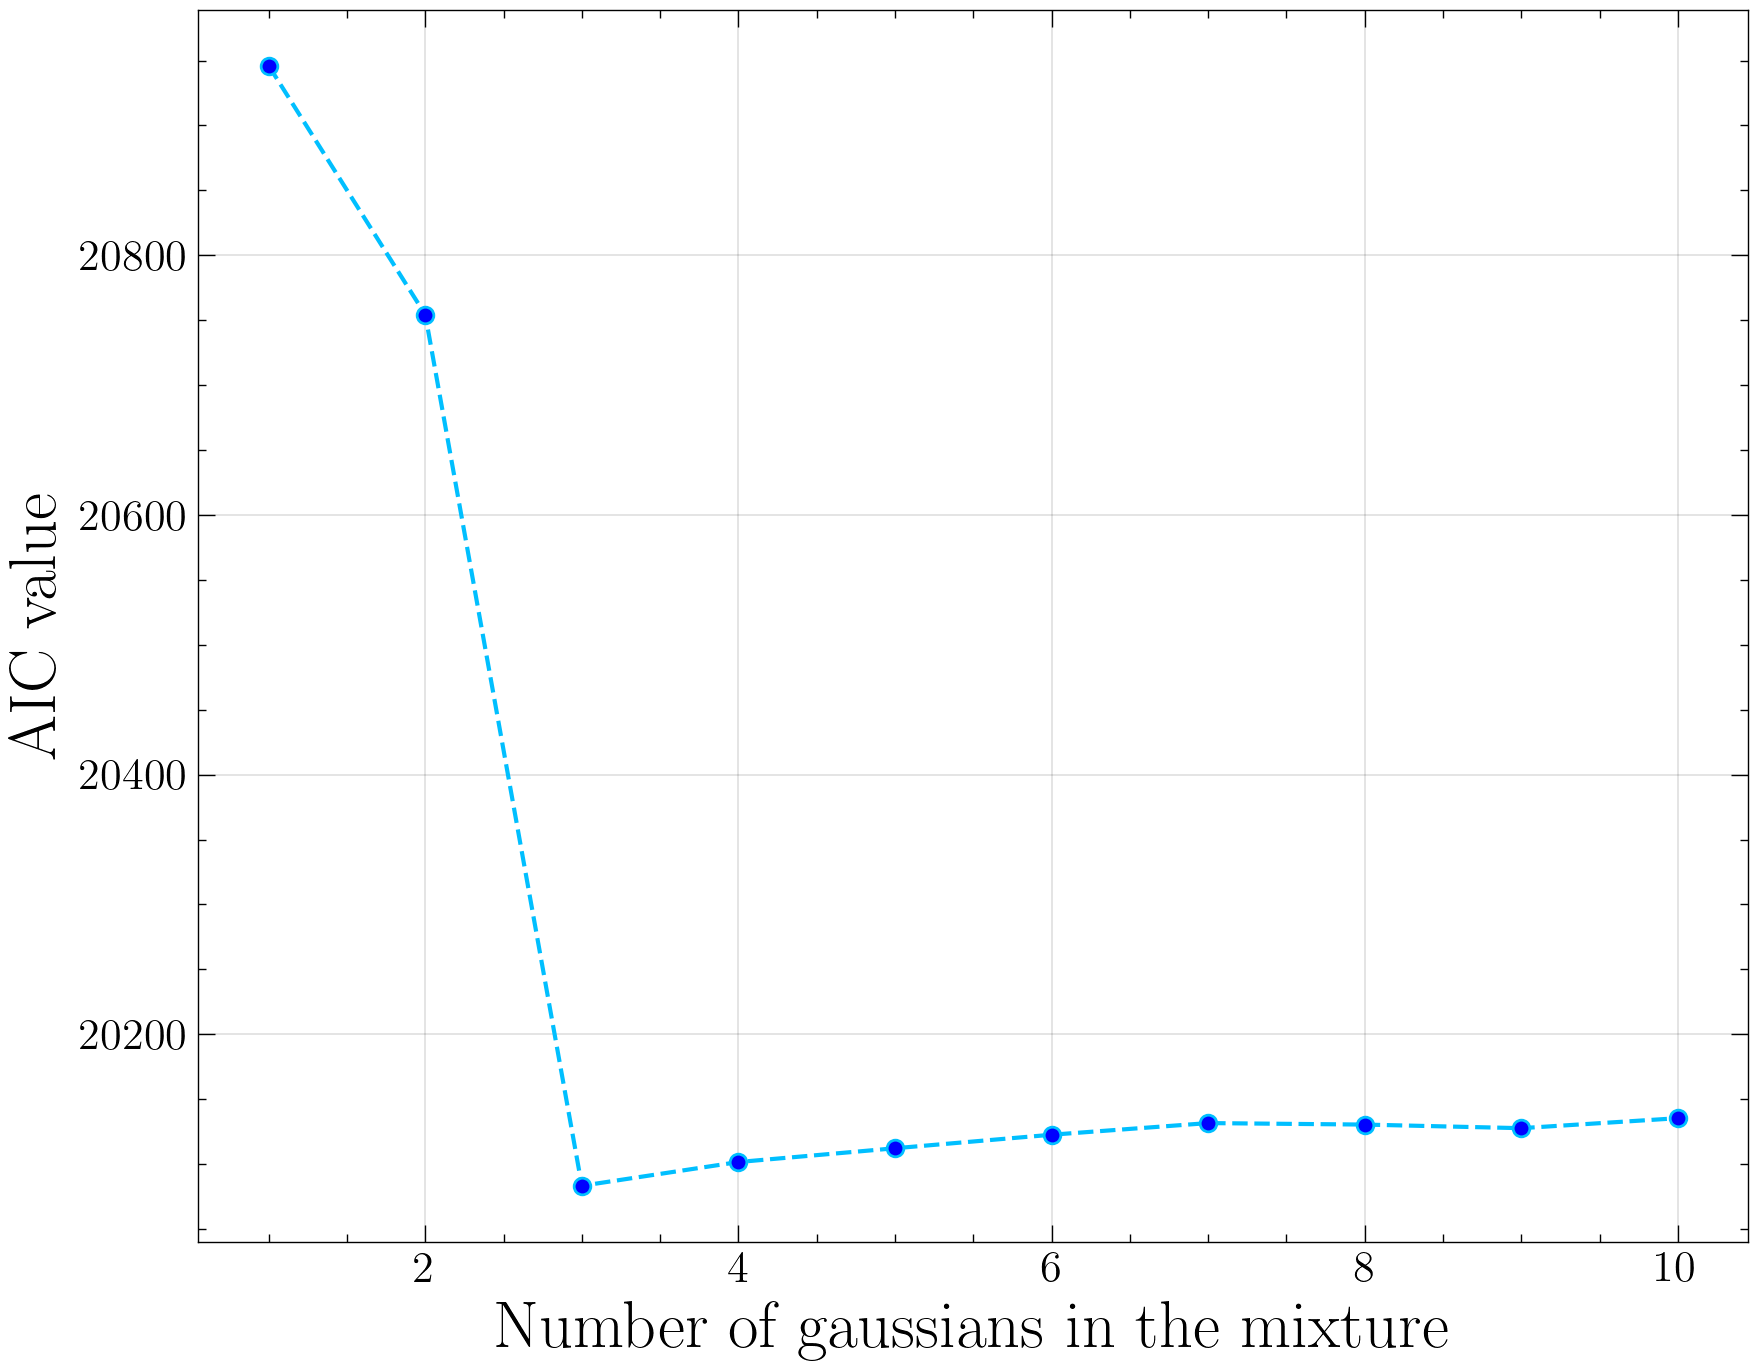

In [7]:
N_array = np.arange(1, 11)
plt.plot(N_array, aic_array, linestyle='--', color='deepskyblue', marker='o', markerfacecolor='blue')
plt.xlabel('Number of gaussians in the mixture')
plt.ylabel('AIC value');

The model with N=3 gaussians is the preferred one. 

Rarely, the model with N=3 identifies the wrong gaussians and, in such a case, N=4 turns out to be the best model.

## Plot of the best model

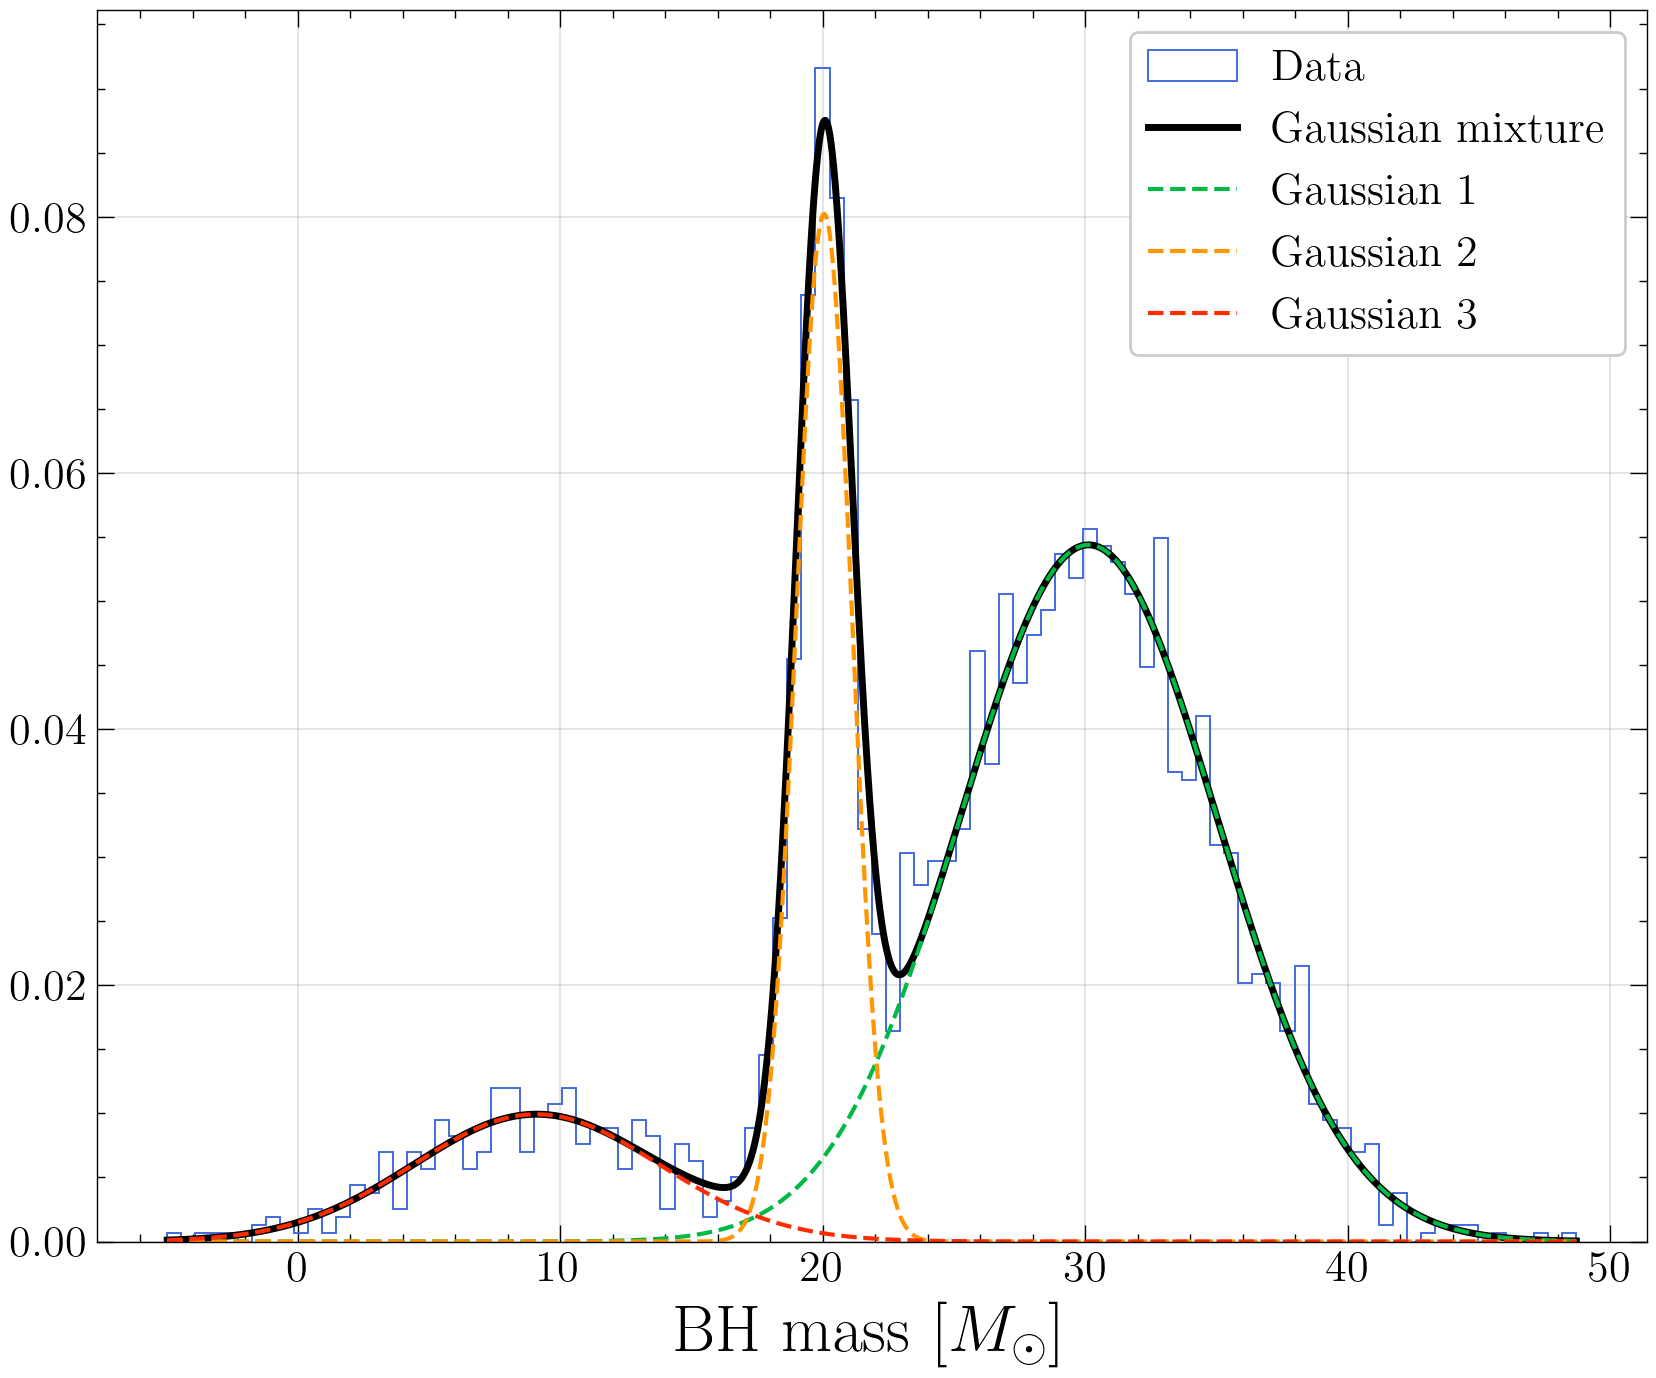

In [8]:
plt.hist(data, density=True, bins=100, histtype='step', edgecolor='royalblue', lw=0.7, label='Data');

x_dense = np.linspace(np.min(data), np.max(data), 10000)[:,np.newaxis]

pdf = np.exp(results['N=3'].score_samples(x_dense))
plt.plot(x_dense, pdf, c='black', lw=2.5, label='Gaussian mixture')

components = results['N=3'].predict_proba(x_dense)
plt.plot(x_dense, components[:,0]*pdf, ls='--', label='Gaussian 1')
plt.plot(x_dense, components[:,1]*pdf, ls='--', label='Gaussian 2')
plt.plot(x_dense, components[:,2]*pdf, ls='--', label='Gaussian 3')

plt.xlabel('BH mass [$M_\odot$]')
plt.legend();